https://m.blog.naver.com/win0k/221599051866

In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'bold'

## 내 데이터

In [26]:
df = pd.read_csv('~/temp3/TM6_docked.csv')
df[:10]

,id,score,hit
0,BA-1045,-9.609,NaN
1,BA-1045,-8.182,NaN
2,BA-1046,-8.363,NaN
3,BA-1047,-5.557,NaN
4,BA-1048,-9.446,NaN
5,BA-1048,-9.207,NaN
6,BA-1049,-9.449,NaN
7,BA-1049,-9.219,NaN
8,BA-1050,-9.091,NaN
9,BA-1050,-8.961,NaN


In [27]:
# Y값 1/0로 변환
real = np.array([1 if x == 1.0 else 0 for x in df['hit']])
real[:5]

array([0, 0, 0, 0, 0])

In [28]:
# 도킹 스코어 양수로
pred = np.array(-df['score'])
pred[:5]

array([9.609, 8.182, 8.363, 5.557, 9.446])

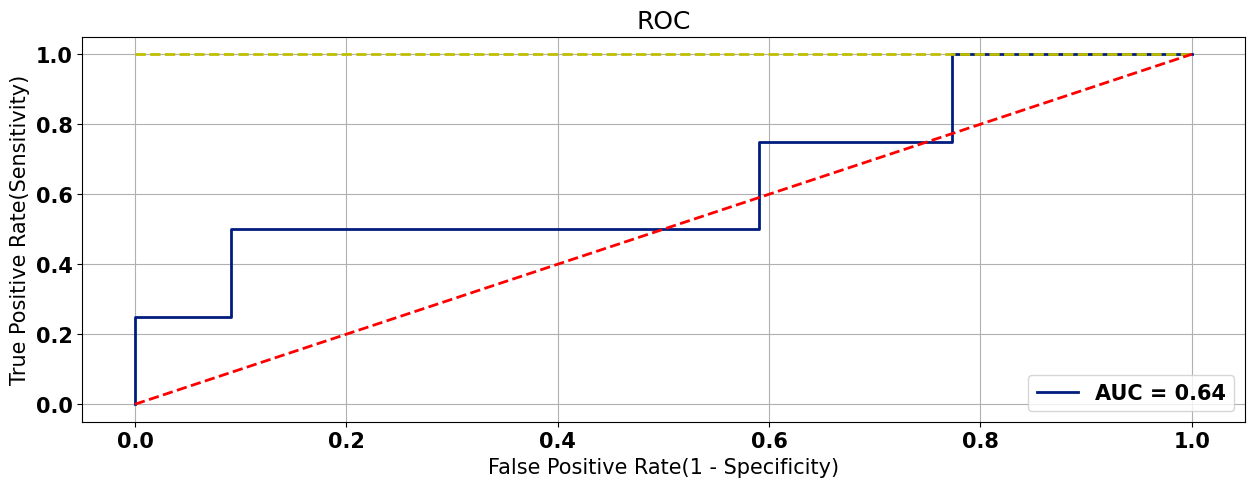

In [29]:
# draw confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

FPR, TPR, THS = roc_curve(real, pred, pos_label=1)
AUC = auc(FPR, TPR)

plt.title('ROC')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(FPR, TPR, label='AUC = %0.2f'%AUC)   # %0.2f는 변수를 소수점 둘째자리까지 표기하겠다는 의미
plt.legend(loc = 'lower right')    # 라벨 표시 위치를 지정 

plt.plot([0,1],[1,1], 'y--')    # 노란색 라인 그림
plt.plot([0,1],[0,1], 'r--')    # 빨간색 라인 그림

plt.show()